In [1]:
import pandas as pd
from pathlib import Path
import pandas as pd
from pathlib import Path
import requests
import hvplot.pandas
from pprint import pprint
from census import Census
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from requests.structures import CaseInsensitiveDict
import datetime
from scipy import stats

# Arsenic Data

In [2]:
arsenic_load = Path("Resources/Unorganized/water_arsenic.csv")
arsenic_data = pd.read_csv(arsenic_load)
arsenic_data = arsenic_data.dropna()
arsenic_data[['max', 'units']] = arsenic_data['max'].str.split(' ', n=1, expand=True)
arsenic_data['max'] = arsenic_data['max'].astype(float)
arsenic_data['year'] = arsenic_data['year'].astype(int)
arsenic_county = arsenic_data.groupby(['year', 'countyServed'])['max'].max().reset_index()

arsenic_trimmed = arsenic_county[(arsenic_county['year']>2009) & (arsenic_county['year']<2022)]
arsenic_trimmed.reset_index(drop=True).sort_values(by='max',ascending = True)

# Top 5 Counties with LEAST max between 2010 and 2022
least_arsenic_county = arsenic_trimmed[
    (arsenic_trimmed['countyServed']=='Hubbard')|
    (arsenic_trimmed['countyServed']=='Lake')|
    (arsenic_trimmed['countyServed']=='Dakota')|
    (arsenic_trimmed['countyServed']=='Kittson')|
    (arsenic_trimmed['countyServed']=='Houston')
]
least_arsenic_county.hvplot.heatmap(x = 'year', y = 'countyServed', title = 'Least Max Arsenic Counties', C = 'max', cmap = 'Reds')

:HeatMap   [year,countyServed]   (max)

In [39]:
# Top 5 Counties with MOST max between 2010 and 2022
# print(arsenic_trimmed.sort_values('max',ascending = True).head(20))
most_arsenic_county = arsenic_trimmed[
    (arsenic_trimmed['countyServed']=='Mahnomen')|
    (arsenic_trimmed['countyServed']=='Beltrami')|
    (arsenic_trimmed['countyServed']=='Blue Earth')|
    (arsenic_trimmed['countyServed']=='Wadena')|
    (arsenic_trimmed['countyServed']=='Clearwater')|
    (arsenic_trimmed['countyServed']=='Dodge')|
    (arsenic_trimmed['countyServed']=='Wright')|
    (arsenic_trimmed['countyServed']=='Scott')|
    (arsenic_trimmed['countyServed']=='Washington')|
    (arsenic_trimmed['countyServed']=='Carver')
]

most_arsenic_county['countyServed'] = pd.Categorical(most_arsenic_county['countyServed'],categories = ['Mahnomen','Beltrami','Blue Earth','Wadena','Clearwater','Dodge','Wright','Scott','Washington','Carver'])
most_arsenic_county = most_arsenic_county.sort_values('countyServed')

heatmap1 = most_arsenic_county.hvplot.heatmap(x = 'year', y = 'countyServed', title = 'Max Arsenic Per County (2010-2021)', C = 'max', cmap = 'Reds')
hvplot.save(heatmap1, 'test.html')
heatmap1

C:\Users\lormi\AppData\Local\Temp\ipykernel_20368\3962610756.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_arsenic_county['countyServed'] = pd.Categorical(most_arsenic_county['countyServed'],categories = ['Mahnomen','Beltrami','Blue Earth','Wadena','Clearwater','Dodge','Wright','Scott','Washington','Carver'])


:HeatMap   [year,countyServed]   (max)


# Radium Data

In [4]:

# radium_load = Path("Resources/Unorganized/water_radon.csv")
# radium_data = pd.read_csv(radium_load)
# radium_data = radium_data.dropna()
# radium_data[['max', 'units']] = radium_data['max'].str.split(' ', n=1, expand=True)
# radium_data['max'] = radium_data['max'].astype(float)
# radium_data['year'] = radium_data['year'].astype(int)
# radium_county = radium_data.groupby(['year', 'countyServed'])['max'].max().reset_index()

# # Highest Max levels of radium between years 2010 - 2022 (new_radium_county)
# new_radium_county = radium_county[(radium_county['year']>2009) & (radium_county['year']<2022)].reset_index(drop=True)

# new_radium_county.sort_values(by='max',ascending = False).head(20)

# # Top 5 Counties with LEAST max radium between 2010 and 2022
# least_radium_county = new_radium_county[
#     (new_radium_county['countyServed']=='Benton')|
#     (new_radium_county['countyServed']=='Cass')|
#     (new_radium_county['countyServed']=='Cook')|
#     (new_radium_county['countyServed']=='Cottonwood')|
#     (new_radium_county['countyServed']=='Hubbard')
# ]

# least_radium_county.hvplot.heatmap(x = 'year', y = 'countyServed',title='Least Max Radium Counties', C = 'max', cmap = 'Reds')

# # Test
# # new_radium_county.sort_values(by=['max','countyServed'],ascending = True).head(20)


# # radium_county.sort_values(by='max',ascending=True).head(20)

# # Top 10 (Pine, Anoka, Todd, Winona, Wright, Dakota)
# # Bottom 10 (Hubbard, Mille Lacs, Stevens, Lac Qui Parle, Carlton, Murray, Pope, Traverse, Clearwater)

# # radium_most_county = radium_county[(radium_county['countyServed']=='Pine')|(radium_county['countyServed']=='Anoka')]
# # radium_most_county


# # radium_county.hvplot.heatmap(x = 'year', y = 'countyServed', C='max', cmap='Reds')

In [5]:
# # Top 5 Counties with MOST max radium between 2010 and 2022
# most_radium_county = new_radium_county[
#     (new_radium_county['countyServed']=='Todd')|
#     (new_radium_county['countyServed']=='Anoka')|
#     (new_radium_county['countyServed']=='Wright')|
#     (new_radium_county['countyServed']=='Dakota')|
#     (new_radium_county['countyServed']=='Winona')
# ]

# most_radium_county.hvplot.heatmap(x = 'year', y = 'countyServed',title = 'Most Max Radium Counties', C = 'max', cmap = 'Reds')

# Poverty Data

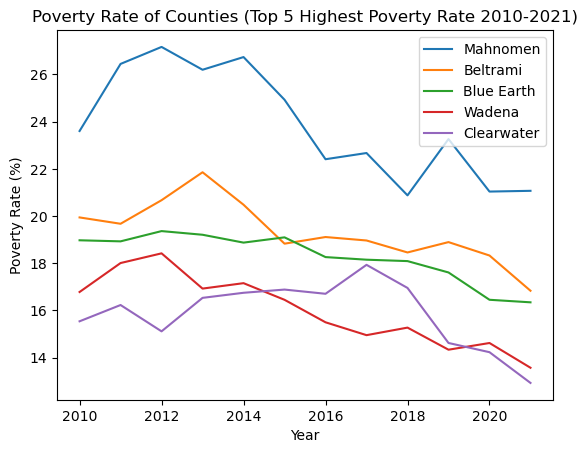

County
Mahnomen      23.864792
Beltrami      19.334416
Blue Earth    18.276759
Wadena        15.997072
Clearwater    15.866194
                ...    
Dodge          6.104780
Wright         5.477450
Scott          5.366845
Washington     5.072448
Carver         4.337190
Name: Poverty %, Length: 87, dtype: float64


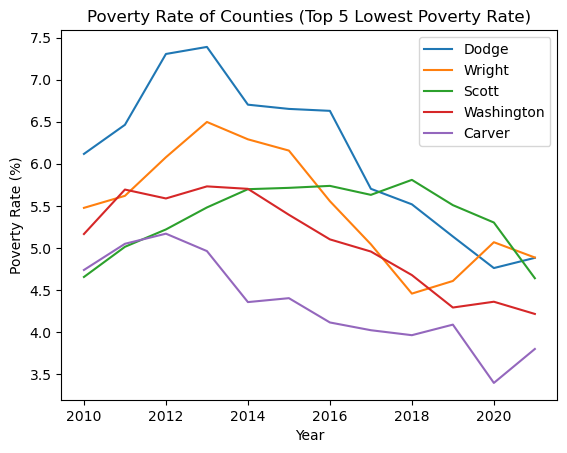

In [6]:

path_poverty = Path("Resources/minnesota_poverty_data.csv")
poverty_df = pd.read_csv(path_poverty)
poverty_filter_df = poverty_df[['Year','Child Poverty %','Child Poverty','Population Poverty','Male Poverty %','Female Poverty %','Poverty %','Sample Population','County','OMB County Type']]
poverty_filter_df


county_wanted_poverty = poverty_filter_df[
    (poverty_filter_df['County']=='Mahnomen')|
    (poverty_filter_df['County']=='Beltrami')|
    (poverty_filter_df['County']=='Blue Earth')|
    (poverty_filter_df['County']=='Wadena')|
    (poverty_filter_df['County']=='Clearwater')
]

# Top 5 Highest Poverty Rate (ALL ARE RURAL COUNTIES)
year = poverty_filter_df['Year'].unique()
benton = poverty_filter_df[poverty_filter_df['County']=='Mahnomen']['Poverty %']
cass = poverty_filter_df[poverty_filter_df['County']=='Beltrami']['Poverty %']
cook = poverty_filter_df[poverty_filter_df['County']=='Blue Earth']['Poverty %']
cottonwood = poverty_filter_df[poverty_filter_df['County']=='Wadena']['Poverty %']
hubbard = poverty_filter_df[poverty_filter_df['County']=='Clearwater']['Poverty %']
# Line Graph
plt.plot(year, benton, label = 'Mahnomen')
plt.plot(year, cass, label = 'Beltrami')
plt.plot(year, cook, label = 'Blue Earth')
plt.plot(year, cottonwood, label = 'Wadena')
plt.plot(year, hubbard, label = 'Clearwater')

plt.title('Poverty Rate of Counties (Top 5 Highest Poverty Rate 2010-2021)')
plt.xlabel('Year')
plt.ylabel('Poverty Rate (%)')
plt.legend()
plt.savefig("Graphs/highestpovertyrate.jpg")
plt.show()

# plt.plot(years, male_poverty_mean_noIndex, label='Male')
print(poverty_filter_df[['County','Poverty %']].groupby('County').mean()['Poverty %'].sort_values(ascending = False))

# Top 5 Lowest Poverty Rates (ALL ARE URBAN COUNTIES)

dodge = poverty_filter_df[poverty_filter_df['County']=='Dodge']['Poverty %']
wright = poverty_filter_df[poverty_filter_df['County']=='Wright']['Poverty %']
scott = poverty_filter_df[poverty_filter_df['County']=='Scott']['Poverty %']
washington = poverty_filter_df[poverty_filter_df['County']=='Washington']['Poverty %']
carver = poverty_filter_df[poverty_filter_df['County']=='Carver']['Poverty %']

# Line Graph
plt.plot(year, dodge, label = 'Dodge')
plt.plot(year, wright, label = 'Wright')
plt.plot(year, scott, label = 'Scott')
plt.plot(year, washington, label = 'Washington')
plt.plot(year, carver, label = 'Carver')

plt.title('Poverty Rate of Counties (Top 5 Lowest Poverty Rate)')
plt.xlabel('Year')
plt.ylabel('Poverty Rate (%)')
plt.legend()
plt.savefig("Graphs/lowestpovertyrate.jpg")
plt.show()


In [7]:
poverty_filter_df[(poverty_filter_df['County']=='Meeker')|
                  (poverty_filter_df['County']=='Ramsey')
                  ]

# Poverty Rates Above 15%
poverty_filter_df[(poverty_filter_df['Poverty %'] < 11)]


,Year,Child Poverty %,Child Poverty,Population Poverty,Male Poverty %,Female Poverty %,Poverty %,Sample Population,County,OMB County Type
1,2010,2.174054,7030.0,20730.0,2.781429,3.629403,6.410831,323359.0,Anoka,Urban
5,2010,2.293233,122.0,500.0,3.966165,5.432331,9.398496,5320.0,Big Stone,Rural
7,2010,3.422865,850.0,2434.0,4.340998,5.460476,9.801474,24833.0,Brown,Rural
8,2010,3.303821,1112.0,3520.0,4.911165,5.546972,10.458138,33658.0,Carlton,Urban
9,2010,1.783788,1571.0,4172.0,1.893926,2.843161,4.737087,88071.0,Carver,Urban
...,...,...,...,...,...,...,...,...,...,...
1035,2021,1.909297,405.0,1503.0,3.498020,3.587592,7.085612,21212.0,Wabasha,Urban
1037,2021,2.090148,377.0,1456.0,3.171259,4.901037,8.072296,18037.0,Waseca,Rural
1038,2021,1.013159,2647.0,11010.0,1.953212,2.260949,4.214160,261262.0,Washington,Urban
1042,2021,1.409854,1953.0,6767.0,2.094929,2.790110,4.885039,138525.0,Wright,Urban


# Urban Vs Rural



In [8]:
# Urban Vs Rural

# Sorted by County to make seeing county values per year easier
poverty_filter_df.sort_values(by='County')

# # Total Average Poverty Rate of Rural and Urban Counties between 2010 and 2021
# print(f'Mean Poverty Rate of Rural and Urban Counties between 2010 and 2021')
# print('-----------------------------------------------')
# print(poverty_filter_df[['OMB County Type','Poverty %']].groupby('OMB County Type').mean()['Poverty %'])

# Total Average Poverty Rate of MN
print(f'Mean Poverty Rate of Minnesota between 2010 and 2021')
print('-----------------------------------------------')
print(poverty_filter_df[['Year','Poverty %']].groupby('Year').mean()['Poverty %'])

# Mean Poverty Rate per County (2010-2021) along with OMB County Type
result = poverty_filter_df[['County', 'Poverty %', 'OMB County Type']].groupby('County').agg({'Poverty %': 'mean', 'OMB County Type': 'first'}).reset_index()

result

# Mean Poverty Rate of MN (2010-2021)
mean_mn = (poverty_filter_df[['Year','Poverty %']].groupby('Year').mean()['Poverty %']).mean()
mean_mn

Mean Poverty Rate of Minnesota between 2010 and 2021
-----------------------------------------------
Year
2010    10.898861
2011    11.384684
2012    11.563574
2013    11.684700
2014    11.757248
2015    11.669400
2016    11.253355
2017    11.038760
2018    10.752444
2019    10.341615
2020     9.977420
2021    10.053256
Name: Poverty %, dtype: float64


11.031276355536079

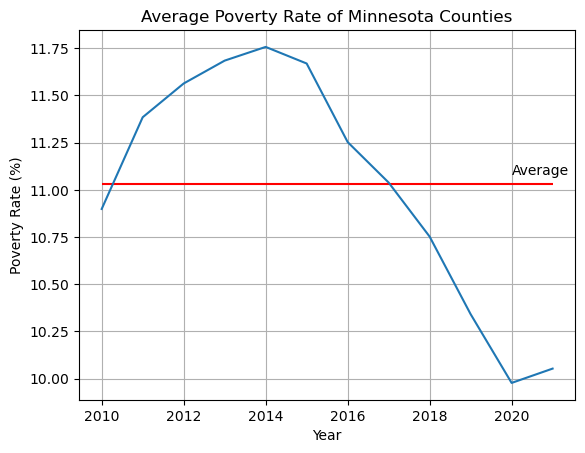

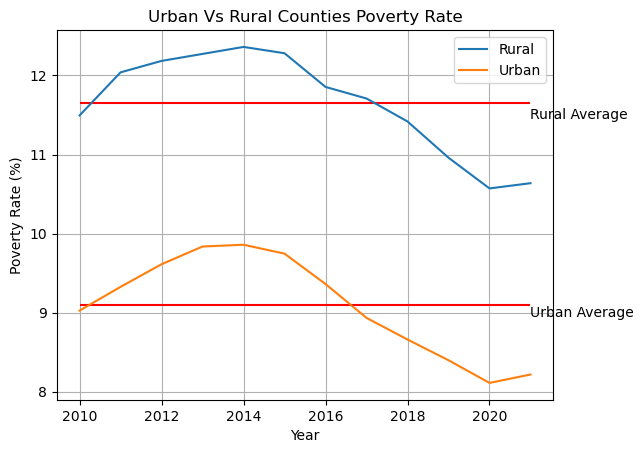

In [9]:
# Line Chart of Rural vs Urban Poverty Rate overtime
rural_urban_df = poverty_filter_df[['Year','OMB County Type','Poverty %']].groupby(['Year','OMB County Type']).mean().reset_index(drop=False)
rural_urban_df

Years = poverty_filter_df['Year'].unique()
rural = rural_urban_df[rural_urban_df['OMB County Type']=='Rural']['Poverty %']
urban = rural_urban_df[rural_urban_df['OMB County Type']=='Urban']['Poverty %']
total_pov = poverty_filter_df[['Year','Poverty %']].groupby('Year').mean()['Poverty %']

plt.hlines(y=11.031276355536079, xmin=2010, xmax=2021, color='red')
plt.text(2020, 11.10, 'Average', ha='left', va='center')

plt.plot(Years, total_pov)
plt.grid()
plt.title('Average Poverty Rate of Minnesota Counties')
plt.ylabel('Poverty Rate (%)')
plt.xlabel('Year')
plt.show()



# Urban Vs Rural Poverty Rate line chart

plt.hlines(y=9.090625, xmin=2010, xmax=2021, color='red')
plt.text(2021, 9, 'Urban Average', ha='left', va='center')

plt.hlines(y=11.648756, xmin=2010, xmax=2021, color='red')
plt.text(2021, 11.5, 'Rural Average', ha='left', va='center')

plt.plot(Years, rural, label = 'Rural')
plt.plot(Years, urban, label = 'Urban')
plt.grid()
plt.legend()
plt.title('Urban Vs Rural Counties Poverty Rate')
plt.ylabel('Poverty Rate (%)')
plt.xlabel('Year')
plt.show()

# Arsenic Vs Poverty

In [10]:
ars_pov_df = arsenic_trimmed[['year','countyServed','max']]

ars_pov_df

ars_pov_df = ars_pov_df.rename(columns = {'year':'Year',
                                            'countyServed':'County'})
ars_pov_df

pov2 = poverty_filter_df[['Year','County','Poverty %','OMB County Type']]
pov2
ars_v_pov = ars_pov_df.merge(pov2,how = 'inner', on = ['Year','County'])
ars_v_pov


,Year,County,max,Poverty %,OMB County Type
0,2010,Aitkin,5.82,13.547027,Rural
1,2010,Anoka,12.60,6.410831,Urban
2,2010,Becker,15.70,11.231197,Rural
3,2010,Beltrami,5.56,19.939110,Rural
4,2010,Benton,2.61,11.836091,Urban
...,...,...,...,...,...
939,2021,Watonwan,3.76,13.030167,Rural
940,2021,Wilkin,5.54,13.534658,Rural
941,2021,Winona,2.96,13.441960,Rural
942,2021,Wright,8.14,4.885039,Urban


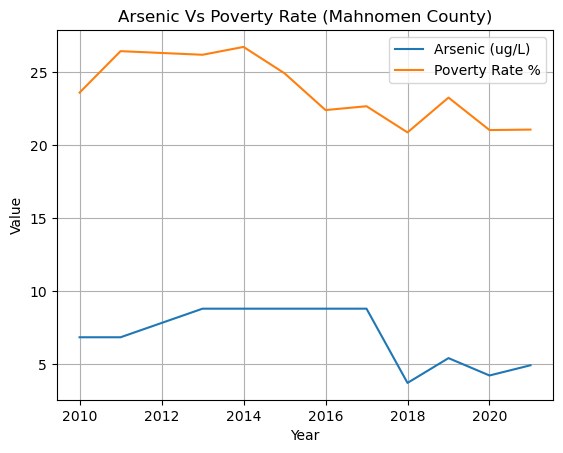

In [11]:
# plot code

# 2 min, 2 max, -- Poverty level

# Highest Poverty by Mean (2010-2021)
# Mahnomen, Beltrami, Blue Earth, Wadena, Clearwater

# Lowest Poverty by Mean (2010-2021)
# Carver, Washington, Scott, Wright, Dodge
ars_pov_year = ars_v_pov['Year'].unique()
ars_pov_ars = ars_v_pov[ars_v_pov['County']=='Mahnomen']['max']
ars_pov_rate = ars_v_pov[ars_v_pov['County']=='Mahnomen']['Poverty %']

plt.plot(ars_pov_year, ars_pov_ars, label = 'Arsenic (ug/L)')
plt.plot(ars_pov_year, ars_pov_rate, label = 'Poverty Rate %')
plt.grid()
plt.legend()
plt.title('Arsenic Vs Poverty Rate (Mahnomen County)')
plt.ylabel('Value')
plt.xlabel('Year')
plt.savefig("Graphs/MahnomenArsenic.jpg")
plt.show()

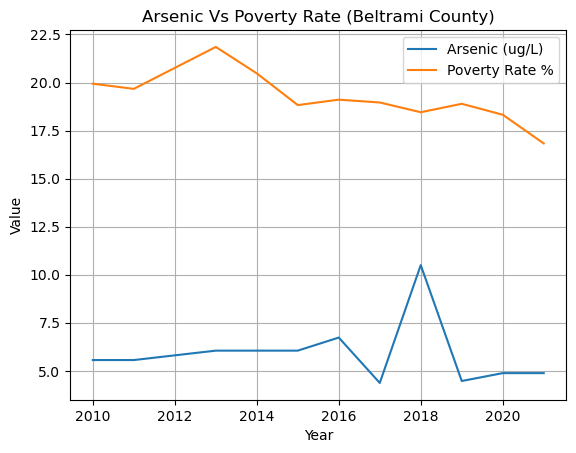

In [12]:
ars_pov_year = ars_v_pov['Year'].unique()
ars_pov_ars2 = ars_v_pov[ars_v_pov['County']=='Beltrami']['max']
ars_pov_rate2 = ars_v_pov[ars_v_pov['County']=='Beltrami']['Poverty %']

plt.plot(ars_pov_year, ars_pov_ars2, label = 'Arsenic (ug/L)')
plt.plot(ars_pov_year, ars_pov_rate2, label = 'Poverty Rate %')
plt.grid()
plt.legend()
plt.title('Arsenic Vs Poverty Rate (Beltrami County)')
plt.ylabel('Value')
plt.xlabel('Year')
plt.savefig("Graphs/BeltramiArsenic.jpg")
plt.show()

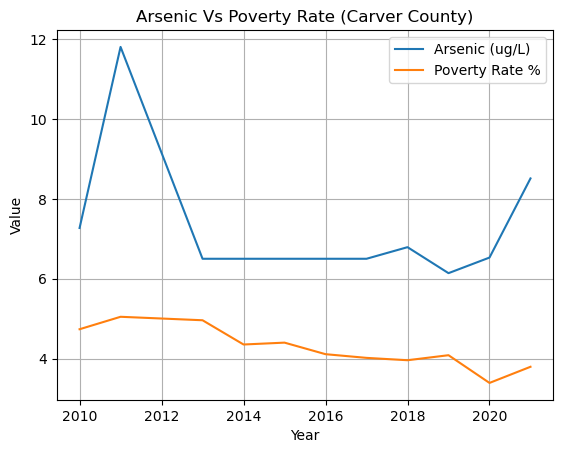

In [13]:
ars_pov_year = ars_v_pov['Year'].unique()
ars_pov_ars3 = ars_v_pov[ars_v_pov['County']=='Carver']['max']
ars_pov_rate3 = ars_v_pov[ars_v_pov['County']=='Carver']['Poverty %']

plt.plot(ars_pov_year, ars_pov_ars3, label = 'Arsenic (ug/L)')
plt.plot(ars_pov_year, ars_pov_rate3, label = 'Poverty Rate %')
plt.grid()
plt.legend()
plt.title('Arsenic Vs Poverty Rate (Carver County)')
plt.ylabel('Value')
plt.xlabel('Year')
plt.savefig("Graphs/CarverArsenic.jpg")
plt.show()

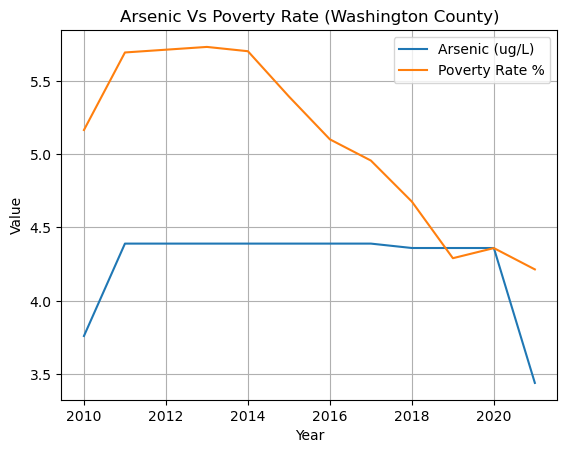

In [14]:
ars_pov_year = ars_v_pov['Year'].unique()
ars_pov_ars4 = ars_v_pov[ars_v_pov['County']=='Washington']['max']
ars_pov_rate4 = ars_v_pov[ars_v_pov['County']=='Washington']['Poverty %']

plt.plot(ars_pov_year, ars_pov_ars4, label = 'Arsenic (ug/L)')
plt.plot(ars_pov_year, ars_pov_rate4, label = 'Poverty Rate %')
plt.grid()
plt.legend()
plt.title('Arsenic Vs Poverty Rate (Washington County)')
plt.ylabel('Value')
plt.xlabel('Year')
plt.savefig("Graphs/WashingtonArsenic.jpg")
plt.show()

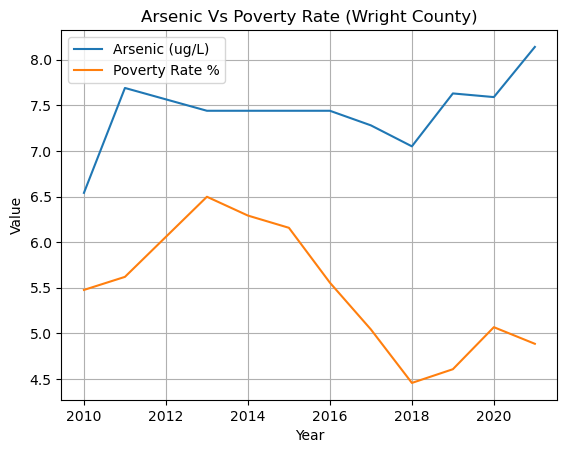

In [15]:
ars_pov_year = ars_v_pov['Year'].unique()
ars_pov_ars5 = ars_v_pov[ars_v_pov['County']=='Wright']['max']
ars_pov_rate5 = ars_v_pov[ars_v_pov['County']=='Wright']['Poverty %']

plt.plot(ars_pov_year, ars_pov_ars5, label = 'Arsenic (ug/L)')
plt.plot(ars_pov_year, ars_pov_rate5, label = 'Poverty Rate %')
plt.grid()
plt.legend()
plt.title('Arsenic Vs Poverty Rate (Wright County)')
plt.ylabel('Value')
plt.xlabel('Year')
plt.savefig("Graphs/WrightArsenic.jpg")
plt.show()

# Poverty Rate is above Arsenic Value in counties with highest poverty rate

# Arsenic Value is above Poverty Rate in counties with lowest poverty rate

# Conclude: Counties with high poverty rate will have lower levels of Arsenic

In [16]:
high_pov_rate = poverty_filter_df[(poverty_filter_df['Poverty %'] >= 14)]
low_pov_rate = poverty_filter_df[(poverty_filter_df['Poverty %'] <= 8)]

# Rename arsenic columns to match poverty columns
arsenal = arsenic_trimmed.rename(columns = {'year':'Year',
                              'countyServed':'County'})
arsenal

# High Poverty rate counties merge with Arsenic data (> 15%)

high_pov_arsenal = high_pov_rate.merge(arsenal, how='inner', on = ['Year','County'])
high_pov_arsenal

# Low Poverty rate counties merge with Arsenic data (<= 15%)
low_pov_arsenal = low_pov_rate.merge(arsenal, how='inner', on = ['Year','County'])
low_pov_arsenal

,Year,Child Poverty %,Child Poverty,Population Poverty,Male Poverty %,Female Poverty %,Poverty %,Sample Population,County,OMB County Type,max
0,2010,2.174054,7030.0,20730.0,2.781429,3.629403,6.410831,323359.0,Anoka,Urban,12.60
1,2010,1.783788,1571.0,4172.0,1.893926,2.843161,4.737087,88071.0,Carver,Urban,7.27
2,2010,2.530394,1280.0,3594.0,2.763665,4.341208,7.104873,50585.0,Chisago,Urban,5.50
3,2010,1.768683,6921.0,21768.0,2.577765,2.985117,5.562881,391308.0,Dakota,Urban,14.80
4,2010,2.199980,433.0,1204.0,2.667412,3.449853,6.117265,19682.0,Dodge,Urban,2.93
...,...,...,...,...,...,...,...,...,...,...,...
175,2021,1.297142,1221.0,4722.0,1.945182,3.071284,5.016467,94130.0,Sherburne,Urban,2.88
176,2021,2.003913,297.0,1179.0,3.333108,4.621820,7.954929,14821.0,Sibley,Rural,42.00
177,2021,1.909297,405.0,1503.0,3.498020,3.587592,7.085612,21212.0,Wabasha,Urban,1.10
178,2021,1.013159,2647.0,11010.0,1.953212,2.260949,4.214160,261262.0,Washington,Urban,3.44


     Year  Child Poverty %  Child Poverty  Population Poverty  Male Poverty %  \
0    2010         7.266370         3055.0              8383.0        9.169184   
1    2010         2.826098         1688.0             11331.0        8.896851   
2    2010         5.263158          439.0              1296.0        6.665867   
3    2010        10.715645          563.0              1240.0       11.914732   
4    2010         4.951477         1898.0              5467.0        6.386309   
..    ...              ...            ...                 ...             ...   
130  2020         4.882622          651.0              1949.0        7.627691   
131  2021         5.452397         2399.0              7406.0        8.138821   
132  2021         2.353825         1535.0             10657.0        7.155015   
133  2021         4.155300         2559.0              8654.0        6.587750   
134  2021         8.585477          454.0              1114.0       10.079425   

     Female Poverty %  Pove

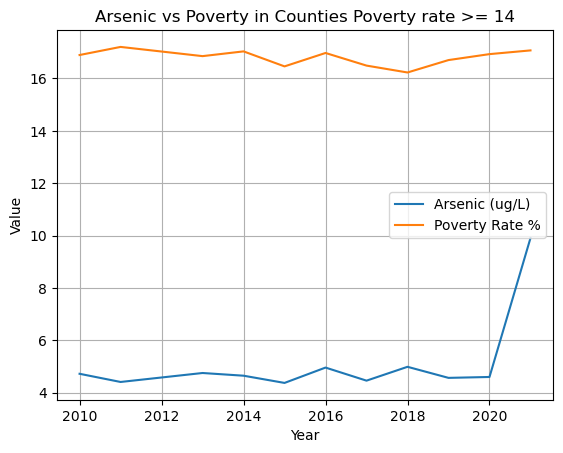

In [17]:
print(high_pov_arsenal)
high_pov_ars_year = high_pov_arsenal['Year'].unique()
high_pov_ars_value = high_pov_arsenal[['Year','max']].groupby('Year')['max'].mean()
high_pov_rate = high_pov_arsenal[['Year','Poverty %']].groupby('Year')['Poverty %'].mean()


plt.plot(high_pov_ars_year, high_pov_ars_value, label = 'Arsenic (ug/L)')
plt.plot(high_pov_ars_year, high_pov_rate, label = 'Poverty Rate %')
plt.grid()
plt.legend()
plt.title('Arsenic vs Poverty in Counties Poverty rate >= 14')
plt.ylabel('Value')
plt.xlabel('Year')
plt.savefig("Graphs/HighPovertyArsenic.jpg")
plt.show()

     Year  Child Poverty %  Child Poverty  Population Poverty  Male Poverty %  \
0    2010         2.174054         7030.0             20730.0        2.781429   
1    2010         1.783788         1571.0              4172.0        1.893926   
2    2010         2.530394         1280.0              3594.0        2.763665   
3    2010         1.768683         6921.0             21768.0        2.577765   
4    2010         2.199980          433.0              1204.0        2.667412   
..    ...              ...            ...                 ...             ...   
175  2021         1.297142         1221.0              4722.0        1.945182   
176  2021         2.003913          297.0              1179.0        3.333108   
177  2021         1.909297          405.0              1503.0        3.498020   
178  2021         1.013159         2647.0             11010.0        1.953212   
179  2021         1.409854         1953.0              6767.0        2.094929   

     Female Poverty %  Pove

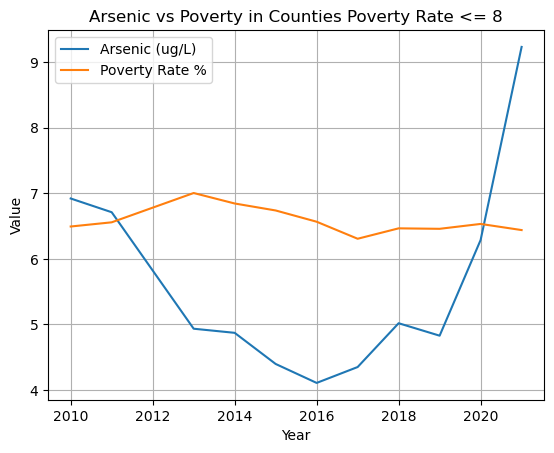

In [18]:
# Low poverty graph
print(low_pov_arsenal)
low_pov_ars_year = low_pov_arsenal['Year'].unique()
low_pov_ars_value = low_pov_arsenal[['Year','max']].groupby('Year')['max'].mean()
low_pov_rate = low_pov_arsenal[['Year','Poverty %']].groupby('Year')['Poverty %'].mean()


plt.plot(low_pov_ars_year, low_pov_ars_value, label = 'Arsenic (ug/L)')
plt.plot(low_pov_ars_year, low_pov_rate, label = 'Poverty Rate %')
plt.grid()
plt.legend()
plt.title('Arsenic vs Poverty in Counties Poverty Rate <= 8')
plt.ylabel('Value')
plt.xlabel('Year')
plt.savefig("Graphs/LowPovertyArsenic.jpg")
plt.show()

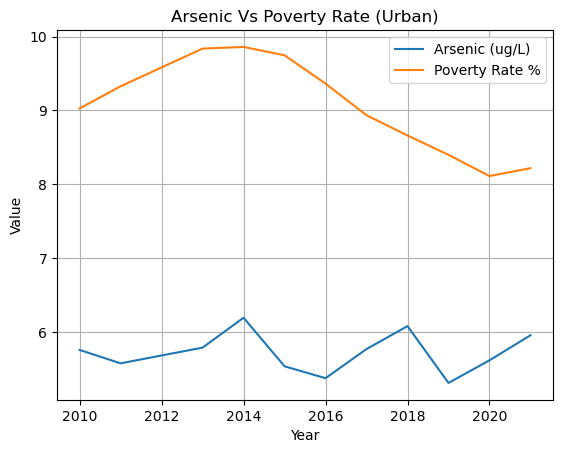

In [19]:
# Urban Vs Rural --- Pov vs Arsenic

# Urban and Rural DF
urban_ars_pov = poverty_filter_df[(poverty_filter_df['OMB County Type'] == 'Urban')]
rural_ars_pov = poverty_filter_df[(poverty_filter_df['OMB County Type'] == 'Rural')]

# Urban and Rural merge with Arsenic DF
urban_pov_arsenal = urban_ars_pov.merge(arsenal, how='inner', on = ['Year','County'])
rural_pov_arsenal = rural_ars_pov.merge(arsenal, how='inner', on = ['Year','County'])

# Urban Plot Graph
urban_pov_ars_year = urban_pov_arsenal['Year'].unique()
urban_pov_ars_value = urban_pov_arsenal[['Year','max']].groupby('Year')['max'].mean()
urban_pov_rate = urban_pov_arsenal[['Year','Poverty %']].groupby('Year')['Poverty %'].mean()


plt.plot(urban_pov_ars_year, urban_pov_ars_value, label = 'Arsenic (ug/L)')
plt.plot(urban_pov_ars_year, urban_pov_rate, label = 'Poverty Rate %')
plt.grid()
plt.legend()
plt.title('Arsenic Vs Poverty Rate (Urban)')
plt.ylabel('Value')
plt.xlabel('Year')
plt.savefig("Graphs/UrbanArsenic.jpg")
plt.show()

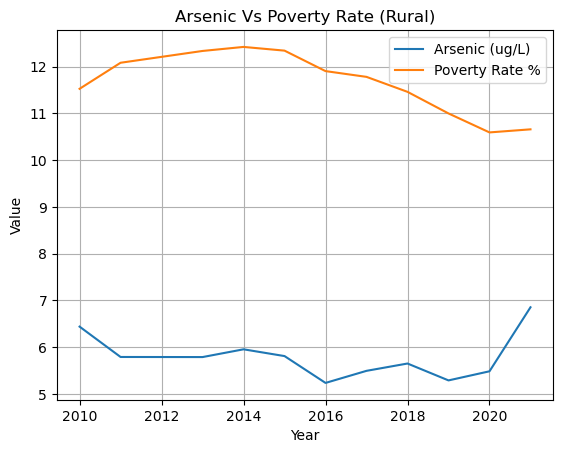

In [20]:
rural_pov_ars_year = rural_pov_arsenal['Year'].unique()
rural_pov_ars_value = rural_pov_arsenal[['Year','max']].groupby('Year')['max'].mean()
rural_pov_rate = rural_pov_arsenal[['Year','Poverty %']].groupby('Year')['Poverty %'].mean()


plt.plot(rural_pov_ars_year, rural_pov_ars_value, label = 'Arsenic (ug/L)')
plt.plot(rural_pov_ars_year, rural_pov_rate, label = 'Poverty Rate %')
plt.grid()
plt.legend()
plt.title('Arsenic Vs Poverty Rate (Rural)')
plt.ylabel('Value')
plt.xlabel('Year')
plt.savefig("Graphs/RuralArsenic.jpg")
plt.show()

# Urban vs Rural shows nothing really significant
# Rural Arsenic value ~ 5.8
# Urban Arsenic value ~ 5.8

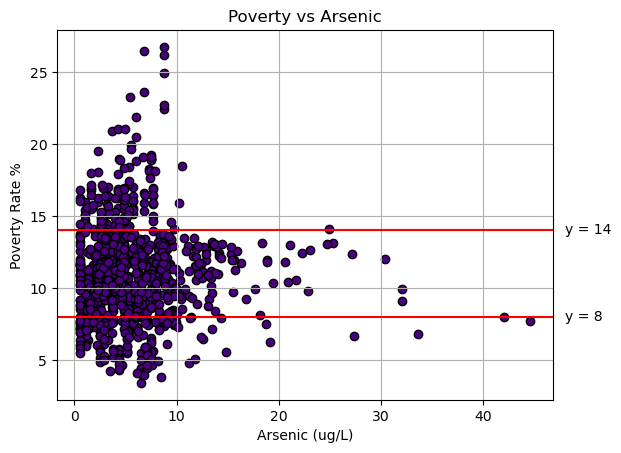

In [36]:
# Scatter Plot Arsenic Poverty Counties


arsenal
poverty_filter_df

pov_ars = arsenal.merge(poverty_filter_df,how = 'inner',on = ['Year','County'])
pov_ars

# Create X,Y variables for scatterplot
x_pov = pov_ars['Poverty %']
x_ars = pov_ars['max']

plt.scatter(x_ars, x_pov, marker="o", facecolors="indigo", edgecolors="black")
plt.axhline(y = 8, color = 'red', linestyle = '-')
plt.axhline(y = 14, color = 'red', linestyle = '-')
plt.grid()
plt.title('Poverty vs Arsenic')
plt.xlabel('Arsenic (ug/L)')
plt.text(48, 14, 'y = 14', ha='left', va='center')
plt.ylabel('Poverty Rate %')
plt.text(48, 8, 'y = 8', ha='left', va='center')
plt.show()

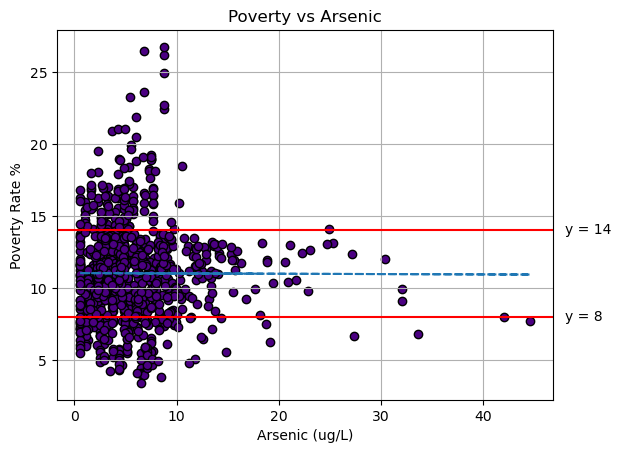

In [38]:
# Adding Regression line
pa_slope, pa_int, pa_r, pa_p, pa_std_err = stats.linregress(x_ars, x_pov)
pa_fit = pa_slope * x_ars + pa_int
plt.plot(x_ars,pa_fit,"--")

plt.scatter(x_ars, x_pov, marker="o", facecolors="indigo", edgecolors="black")
plt.axhline(y = 8, color = 'red', linestyle = '-')
plt.axhline(y = 14, color = 'red', linestyle = '-')
plt.grid()
plt.title('Poverty vs Arsenic')
plt.xlabel('Arsenic (ug/L)')
plt.text(48, 14, 'y = 14', ha='left', va='center')
plt.ylabel('Poverty Rate %')
plt.text(48, 8, 'y = 8', ha='left', va='center')
plt.show()